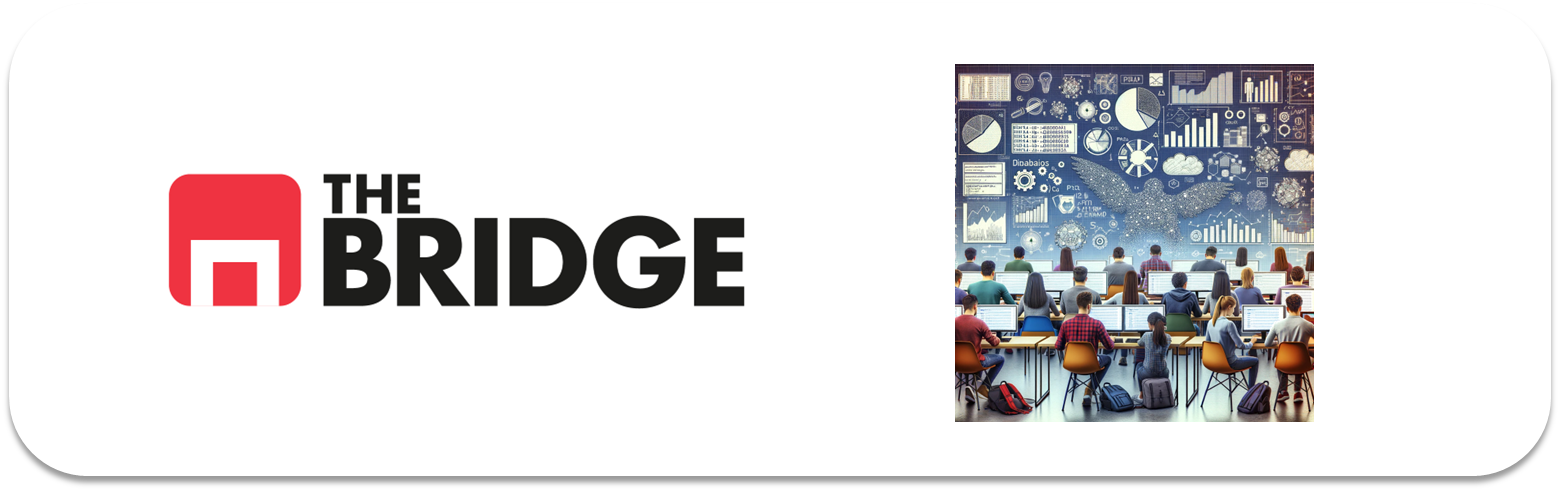

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [2]:
import pandas as pd
pd.options.mode.copy_on_write = True
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df = pd.read_csv("data/hard_to_find/obligatoria_hard.csv", sep="|")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<Axes: xlabel='MEDV', ylabel='Count'>

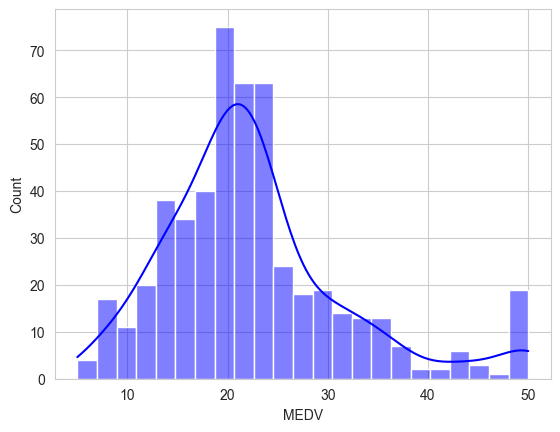

In [5]:
sns.histplot(df['MEDV'], color='Blue', kde = True)

In [6]:
# Feautures
X = df[['CRIM', 'ZN', 'INDUS','CHAS', 'NOX','RM', 'AGE', 'DIS','RAD', 'TAX','PTRATIO','LSTAT']]

# Target
y = df['MEDV']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 12)
(404, 12)
(102, 12)
(404,)
(102,)


In [9]:
corr = df.corr(numeric_only=True)["MEDV"].sort_values(ascending=False)
corr

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

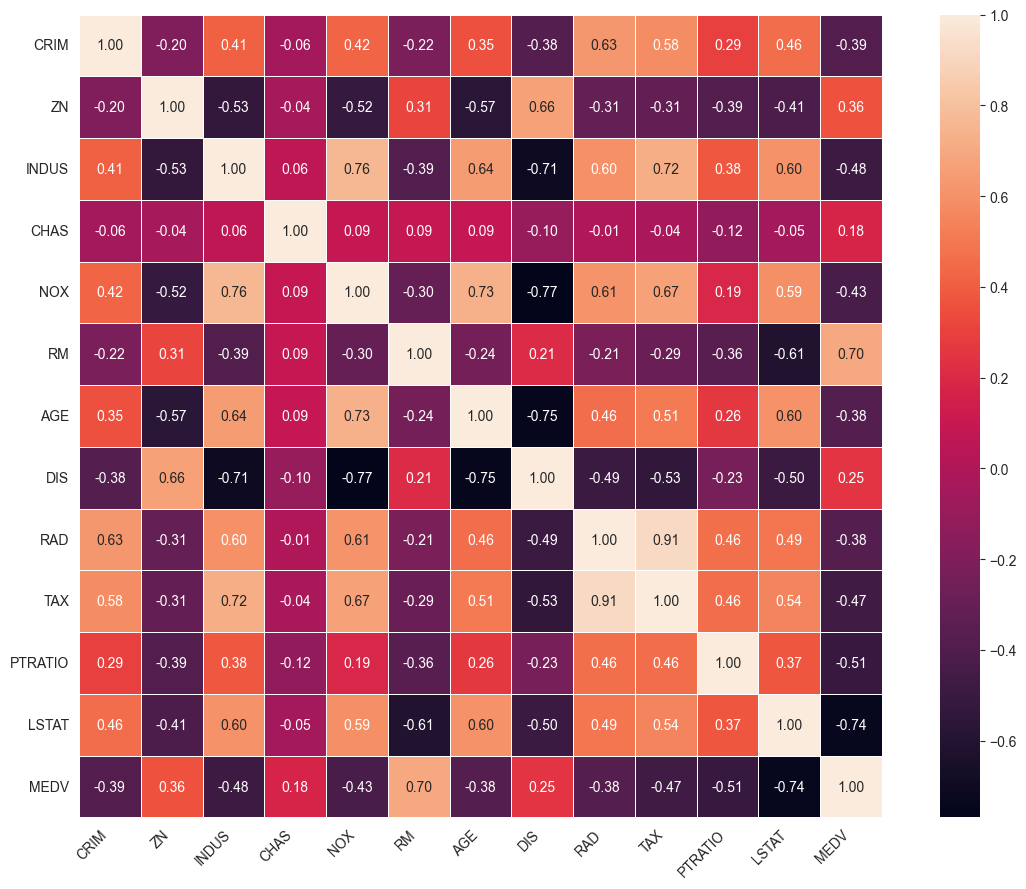

In [10]:
plt.figure(figsize=(12, 9))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

# Creamos un objeto
lm = LinearRegression()

In [13]:
# Entrenamos con los datos de train
lm.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
lm.intercept_

np.float64(22.796534653465343)

In [15]:
lm.coef_

array([-1.12747328,  0.712109  ,  0.17385771,  0.787152  , -2.13759896,
        3.00441958, -0.10050029, -3.11945942,  2.0588977 , -1.87131687,
       -1.9918715 , -3.81901574])

In [16]:
coef_df = pd.DataFrame(lm.coef_, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-1.127473
ZN,0.712109
INDUS,0.173858
CHAS,0.787152
NOX,-2.137599
RM,3.004420
AGE,-0.100500
DIS,-3.119459
RAD,2.058898
TAX,-1.871317


In [17]:
new_home = pd.DataFrame([{
    "CRIM": 0.10,
    "ZN": 0.0,
    "INDUS": 8.0,
    "CHAS": 0.0,
    "NOX": 0.50,
    "RM": 6.5,
    "AGE": 40.0,
    "DIS": 4.0,
    "RAD": 4.0,
    "TAX": 300.0,
    "PTRATIO": 18.0,
    "LSTAT": 12.0
}])


new_home = new_home[X_train.columns]


new_home_scaled = scaler.transform(new_home)


pred_medv = lm.predict(new_home_scaled)

print("Predicción MEDV:", pred_medv[0])

Predicción MEDV: 24.639880823873888


In [18]:
X_test_scaled = scaler.transform(X_test)


y_pred = lm.predict(X_test_scaled)


comparacion = pd.DataFrame({"real": y_test.values, "pred": y_pred})
comparacion.head()

,real,pred
0,23.6,28.958215
1,32.4,36.287541
2,13.6,14.098836
3,22.8,25.033144
4,16.1,17.601968


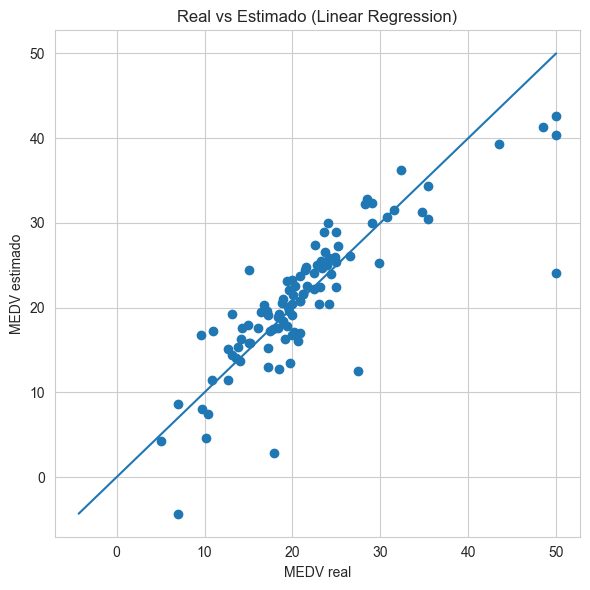

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("MEDV real")
plt.ylabel("MEDV estimado")
plt.title("Real vs Estimado (Linear Regression)")
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx])
plt.tight_layout()
plt.show()

In [20]:
from sklearn import metrics

In [21]:
pred_train = lm.predict(X_train_scaled)
pred_test  = lm.predict(X_test_scaled)

print("MAE train:", metrics.mean_absolute_error(y_train, pred_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print("R2 train:", lm.score(X_train_scaled, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_test))
print("MSE test:", metrics.mean_squared_error(y_test, pred_test))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print("R2 test:", lm.score(X_test_scaled, y_test))

MAE train: 3.424468775949534
MSE train: 22.60428647941742
RMSE train: 4.754396542087904
R2 train: 0.739801993681731
MAE test: 3.111377388238187
MSE test: 22.777708563866035
RMSE test: 4.772599769922682
R2 test: 0.689396788461476


In [23]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10]
res = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    pred_ridge = ridge.predict(X_test_scaled)

    res.append({
        "alpha": a,
        "MAE_test": metrics.mean_absolute_error(y_test, pred_ridge),
        "RMSE_test": np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)),
        "R2_test": ridge.score(X_test_scaled, y_test)
    })

pd.DataFrame(res).sort_values("RMSE_test")

,alpha,MAE_test,RMSE_test,R2_test
0,0.1,3.110950,4.772950,0.689351
1,1.0,3.107353,4.776099,0.688941
2,10.0,3.085876,4.805474,0.685103


Tras construir el modelo de Regresión Lineal y evaluarlo con un conjunto de test reservado, el modelo muestra un rendimiento sólido y una generalización razonable: en train obtiene aproximadamente MAE = 3.42, RMSE = 4.75 y R² = 0.74, mientras que en test alcanza MAE = 3.11, RMSE = 4.77 y R² = 0.69. El gráfico Real vs Estimado confirma que la mayoría de predicciones se sitúan cerca de la diagonal, aunque existe mayor dispersión en valores altos (posiblemente por el tope de MEDV y ciertas no linealidades). Para mejorar la estabilidad del modelo, se probó regularización Ridge con alpha = 0.1, 1 y 10, resultando alpha = 0.1 la mejor opción (menor RMSE y mayor R² en test, con diferencias pequeñas respecto a alpha = 1). Por ello, el modelo final seleccionado es Ridge (alpha = 0.1), ya que ofrece el mejor equilibrio entre rendimiento en test y robustez frente a multicolinealidad, manteniendo una capacidad de generalización adecuada.